In [29]:
# All project packages imported at the start

# Project packages
import pandas as pd
import numpy as np

# Visualisations
import matplotlib.pyplot as plt 
import seaborn as sns

# Statistics
from scipy import stats
from scipy.stats import norm, skew
from statistics import mode

# Machine Learning
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import Lasso, Ridge, RidgeCV, ElasticNet


from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge


def suppress_warnings():
    import warnings
    warnings.filterwarnings('ignore', category = DeprecationWarning) 
    warnings.filterwarnings('ignore', category = FutureWarning) 


    
train = pd.read_csv('train.csv')
    
test = pd.read_csv('test.csv')



In [30]:
from sklearn.utils import shuffle

train = shuffle(train,n_samples= 10_000)


In [31]:
train = train.drop(train[train.isnull().any(1)].index, axis = 0)
train = train.round(3)

In [32]:
train.sort_values(by='bestSoldierPerc', ascending=False).head(20)


,soldierId,shipId,attackId,assists,greekFireItems,healthLost,knockedOutSoldiers,throatSlits,healingPotionsUsed,killRank,...,numSaves,horseRideDistance,horseRideKills,swimmingDistance,friendlyKills,castleTowerDestroys,onFootDistance,weaponsUsed,respectEarned,bestSoldierPerc
143928,205300.0,2581031.0,728.0,2.0,6.0,845.8,6.0,3.0,4.0,1.0,...,0.0,485.8,0.0,0.000,0.0,0.0,3318.0,10.0,1516.0,1.0
865915,1233243.0,2645704.0,8758.0,0.0,1.0,131.8,1.0,0.0,0.0,20.0,...,0.0,0.0,0.0,0.000,0.0,0.0,485.7,2.0,1500.0,1.0
447907,632011.0,369382.0,18353.0,0.0,7.0,338.5,0.0,0.0,6.0,6.0,...,0.0,0.0,0.0,33.730,0.0,0.0,4564.0,6.0,1598.0,1.0
2666574,3798176.0,761487.0,27316.0,1.0,4.0,610.6,4.0,1.0,1.0,3.0,...,1.0,1227.0,0.0,0.000,0.0,0.0,3018.0,6.0,1529.0,1.0
2944998,4195961.0,748903.0,27033.0,1.0,1.0,574.8,4.0,0.0,6.0,2.0,...,1.0,0.0,0.0,0.000,0.0,0.0,1484.0,3.0,1500.0,1.0
416378,580032.0,1078689.0,34535.0,2.0,6.0,1151.0,6.0,4.0,2.0,1.0,...,0.0,0.0,0.0,0.000,0.0,0.0,3882.0,8.0,1488.0,1.0
950564,1338172.0,1600869.0,46380.0,1.0,4.0,258.8,2.0,1.0,3.0,9.0,...,0.0,333.4,0.0,6.504,0.0,0.0,3034.0,6.0,1495.0,1.0
2560409,3652149.0,171595.0,13840.0,7.0,3.0,317.5,1.0,1.0,5.0,9.0,...,1.0,0.0,0.0,0.000,0.0,0.0,3554.0,6.0,1500.0,1.0
2297415,3269350.0,909893.0,30719.0,5.0,2.0,640.8,1.0,2.0,2.0,8.0,...,2.0,0.0,0.0,0.000,0.0,0.0,2300.0,2.0,1500.0,1.0
1158073,1646965.0,320973.0,17257.0,1.0,4.0,773.5,2.0,2.0,3.0,1.0,...,0.0,0.0,0.0,0.000,0.0,0.0,4587.0,5.0,1519.0,1.0


In [33]:
train.sort_values(by='bestSoldierPerc', ascending=False).tail(20)

,soldierId,shipId,attackId,assists,greekFireItems,healthLost,knockedOutSoldiers,throatSlits,healingPotionsUsed,killRank,...,numSaves,horseRideDistance,horseRideKills,swimmingDistance,friendlyKills,castleTowerDestroys,onFootDistance,weaponsUsed,respectEarned,bestSoldierPerc
3096632,4407096.0,1328001.0,40193.0,0.0,0.0,0.000,0.0,0.0,0.0,83.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,1503.0,0.0
1364351,1934131.0,1102220.0,35051.0,1.0,0.0,0.000,0.0,0.0,0.0,98.0,...,0.0,0.0,0.0,0.0,0.0,0.0,41.56,2.0,1497.0,0.0
1263672,1793014.0,818247.0,28603.0,0.0,0.0,0.000,0.0,0.0,0.0,91.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,1466.0,0.0
2452356,3484229.0,1595328.0,46258.0,0.0,0.0,0.000,0.0,0.0,0.0,70.0,...,0.0,0.0,0.0,0.0,0.0,0.0,40.23,5.0,1500.0,0.0
4271953,6102514.0,181700.0,1405.0,0.0,0.0,0.000,0.0,0.0,0.0,92.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,1615.0,0.0
3085397,4395861.0,816794.0,28573.0,0.0,0.0,4.561,1.0,0.0,0.0,34.0,...,0.0,0.0,0.0,0.0,0.0,0.0,49.30,1.0,1516.0,0.0
1068813,1517225.0,551010.0,22528.0,0.0,0.0,0.000,0.0,0.0,0.0,94.0,...,0.0,0.0,0.0,0.0,0.0,0.0,44.58,1.0,1540.0,0.0
2655492,3787094.0,262669.0,15939.0,0.0,0.0,0.000,0.0,0.0,1.0,90.0,...,0.0,0.0,0.0,0.0,0.0,0.0,55.27,1.0,1481.0,0.0
3174241,4524227.0,662941.0,25081.0,0.0,0.0,0.000,0.0,0.0,0.0,91.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,1497.0,0.0
787479,1114218.0,668759.0,25203.0,0.0,0.0,0.000,0.0,0.0,0.0,98.0,...,0.0,0.0,0.0,0.0,0.0,0.0,27.07,1.0,1500.0,0.0


In [34]:
train_ID = train['soldierId']
test_ID = test['soldierId']

train.drop("soldierId", axis = 1, inplace = True)
test.drop("soldierId", axis = 1, inplace = True)


train.drop(['horseRideKills','numSaves','swimmingDistance','friendlyKills','castleTowerDestroys','respectEarned'], axis = 1, inplace = True)
test.drop(['horseRideKills','numSaves','swimmingDistance','friendlyKills','castleTowerDestroys','respectEarned'], axis = 1, inplace = True)



train.drop("knockedOutSoldiers", axis = 1, inplace = True)
test.drop("knockedOutSoldiers", axis = 1, inplace = True)

train.drop("shipId", axis = 1, inplace = True)
test.drop("shipId", axis = 1, inplace = True)
train.drop("attackId", axis = 1, inplace = True)
test.drop("attackId", axis = 1, inplace = True)


In [35]:
train.head()

,assists,greekFireItems,healthLost,throatSlits,healingPotionsUsed,killRank,killPoints,enemiesKilled,killingStreaks,farthermostKill,numShips,horseRideDistance,onFootDistance,weaponsUsed,bestSoldierPerc
3482004,0.0,0.0,96.89,1.0,2.0,18.0,1117.0,2.0,1.0,46.10,48.0,0.0,270.2,1.0,0.500
3140504,0.0,2.0,169.50,1.0,5.0,17.0,1109.0,2.0,1.0,17.54,92.0,0.0,1097.0,6.0,0.634
2310678,3.0,5.0,394.70,1.0,7.0,8.0,1270.0,3.0,1.0,79.22,26.0,0.0,2617.0,6.0,0.808
1500313,0.0,0.0,0.00,0.0,0.0,47.0,1029.0,0.0,0.0,0.00,30.0,0.0,311.3,2.0,0.828
4225511,0.0,0.0,28.38,0.0,0.0,58.0,988.0,0.0,0.0,0.00,93.0,607.8,619.0,4.0,0.479


In [36]:
train.columns
catagorical_columns = ['assists', 'greekFireItems', 'healingPotionsUsed', 'enemiesKilled', 
                      'killingStreaks', 'weaponsUsed']
Numerial_columns = [ 'healthLost', 'throatSlits',  'killRank',  'killPoints','farthermostKill', 
                    'numShips', 'horseRideDistance', 'onFootDistance',  'bestSoldierPerc']

assists


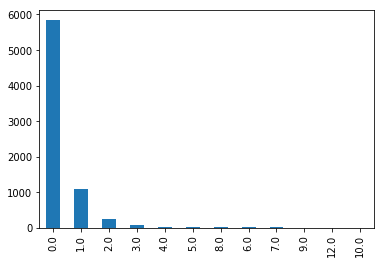

greekFireItems


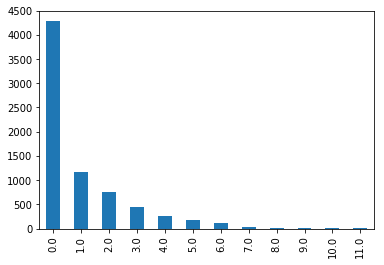

healingPotionsUsed


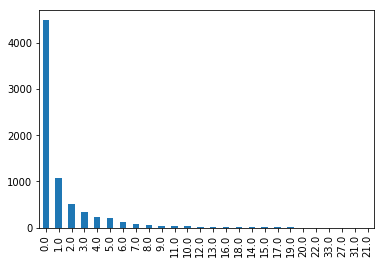

enemiesKilled


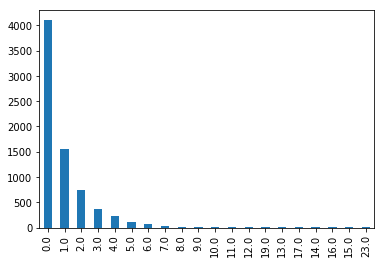

killingStreaks


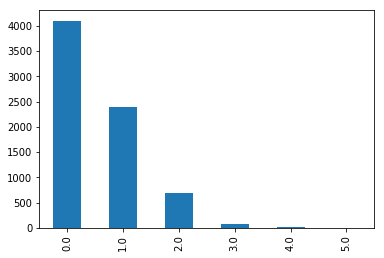

weaponsUsed


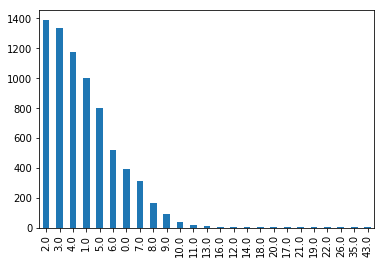

In [37]:
columns = train.drop('bestSoldierPerc', axis=1).columns
train_col = train.columns

index = train.index

for x in catagorical_columns:
    train[x].value_counts().plot(kind='bar')
    print(x)
    plt.show()
#     print('value counts for {} is {}'.format(x, train['{}'.format(x)].value_counts()))

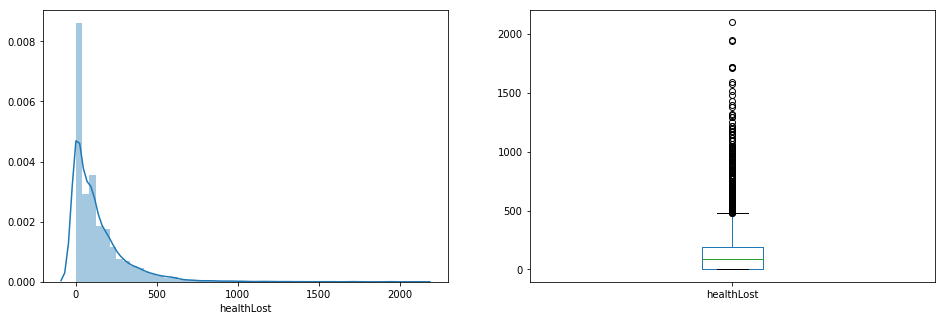

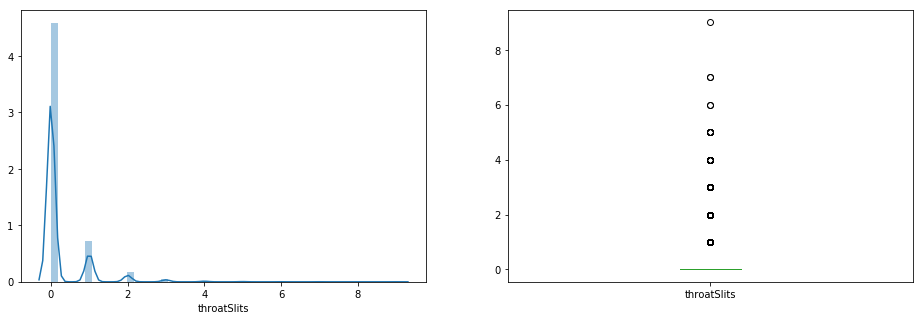

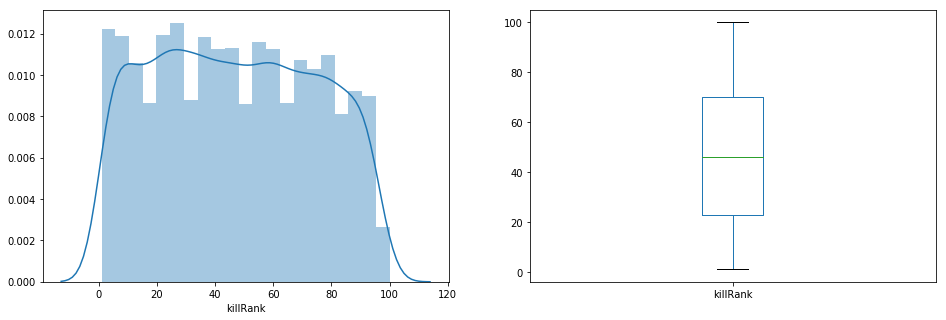

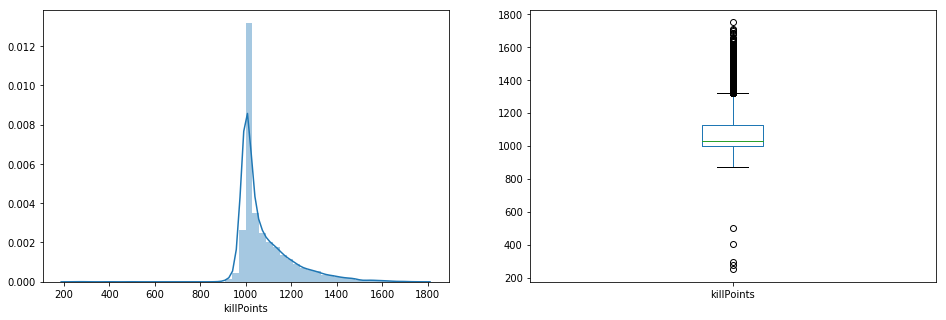

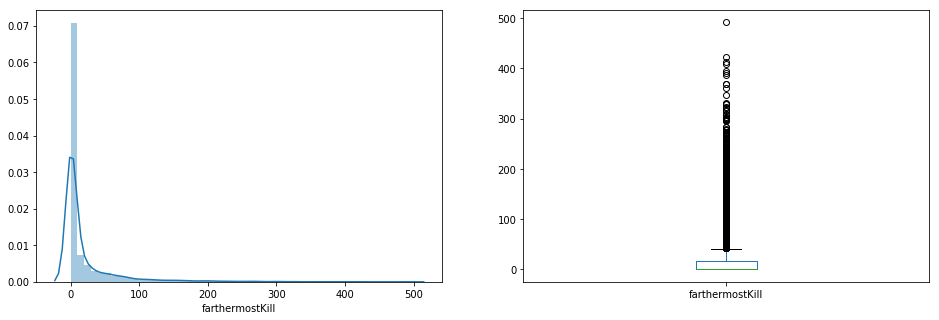

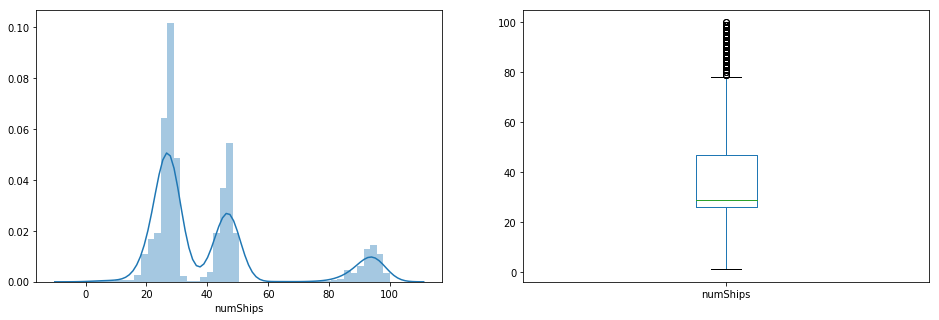

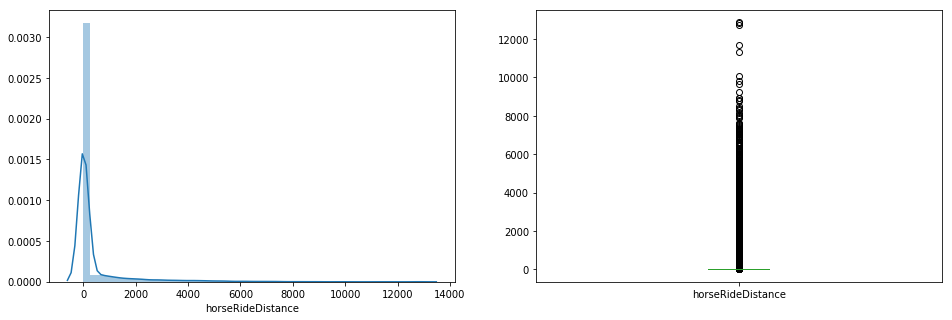

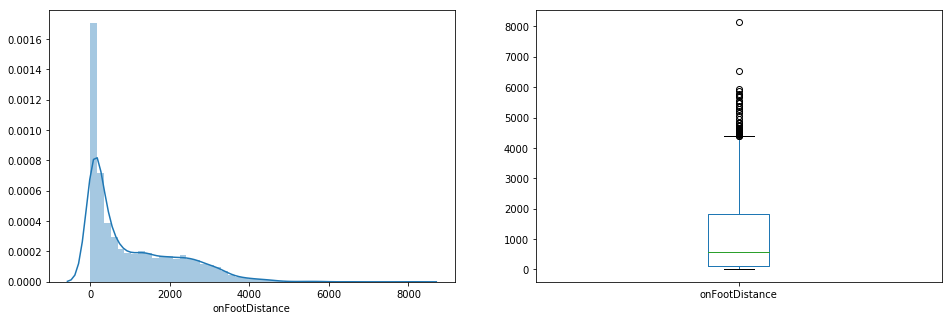

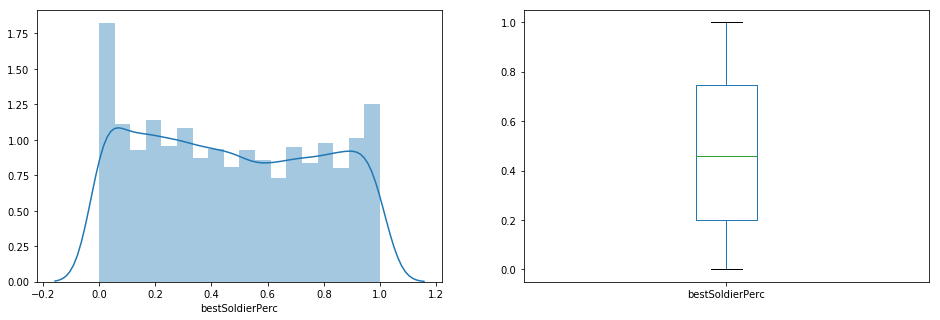

In [38]:
for col in Numerial_columns:
    plt.figure(1)
    plt.subplot(121)
    sns.distplot(train[col]);

    plt.subplot(122)
    train[col].plot.box(figsize=(16,5))

    plt.show()

In [39]:

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

train = scaler.fit_transform(train)
train

array([[0.        , 0.        , 0.04622615, ..., 0.03322676, 0.02325581,
        0.5       ],
       [0.        , 0.18181818, 0.08086832, ..., 0.13489916, 0.13953488,
        0.634     ],
       [0.25      , 0.45454545, 0.18831107, ..., 0.32181505, 0.13953488,
        0.808     ],
       ...,
       [0.        , 0.09090909, 0.04770992, ..., 0.02102804, 0.04651163,
        0.261     ],
       [0.        , 0.        , 0.        , ..., 0.00992991, 0.06976744,
        0.208     ],
       [0.        , 0.        , 0.05877863, ..., 0.04096163, 0.04651163,
        0.458     ]])

In [40]:
train = pd.DataFrame(data=train, index = index, columns = train_col)

# Watchout for null features

In [41]:
train.isnull().sum()

assists               0
greekFireItems        0
healthLost            0
throatSlits           0
healingPotionsUsed    0
killRank              0
killPoints            0
enemiesKilled         0
killingStreaks        0
farthermostKill       0
numShips              0
horseRideDistance     0
onFootDistance        0
weaponsUsed           0
bestSoldierPerc       0
dtype: int64

# Preparing X and y  dataset

In [42]:
x = train.drop(['bestSoldierPerc',],1)
y = train.bestSoldierPerc

# Dummy Regressor

In [43]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size =0.2)

from sklearn.dummy import DummyRegressor
lm_dummy_mean = DummyRegressor(strategy = 'mean').fit(X_train, y_train)

print('train score', lm_dummy_mean.score(X_train, y_train))
print('test score', lm_dummy_mean.score(X_test ,y_test))

train score 0.0
test score -7.686647365279242e-06


# Ridge Regression

In [44]:
%%time

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size =0.2)

from sklearn.linear_model import ridge
from sklearn.preprocessing import MinMaxScaler
 

linridge = Ridge(alpha=1).fit(x_train, y_train)

print('ridge regression linear model intercept: {}'
     .format(linridge.intercept_))
print('ridge regression linear model coeff:\n{}'
     .format(linridge.coef_))
print('Number of non-zero features: {}'
     .format(np.sum(linridge.coef_ != 0)))
print('R-squared score (training): {:.3f}'
     .format(linridge.score(x_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linridge.score(x_test, y_test)))




ridge regression linear model intercept: 0.6230596390451991
ridge regression linear model coeff:
[ 0.20844886  0.15995895  0.03819654 -0.06011677  0.01748907 -0.68289671
 -0.01230081 -0.10661419 -0.6575317  -0.03314101  0.12678377  0.03457815
  1.02008036  0.56567041]
Number of non-zero features: 14
R-squared score (training): 0.807
R-squared score (test): 0.798
CPU times: user 43.4 ms, sys: 39.2 ms, total: 82.5 ms
Wall time: 32.4 ms


# Lasso Regression

In [45]:
from sklearn.linear_model import Lasso

alpha_lasso = [ 1e-15, 1e-10, 1e-8, 1e-5,1e-4, 1e-3,1,]

from sklearn.preprocessing import MinMaxScaler
 

train_score = []
test_score = []

for alpha in alpha_lasso:
    
    lasso_model= Lasso(alpha=alpha, max_iter=1000)
    x_train, x_test, y_train, y_test = train_test_split(x,y, test_size =0.2)
    lasso_model.fit(x_train, y_train)
    train_score.append(lasso_model.score(x_train, y_train))
    test_score.append(lasso_model.score(x_test, y_test))
lasso_scores = pd.DataFrame({'alpha_lasso':alpha_lasso, 'train_score':train_score, 'test_score':test_score})

# for index, coefficient in enumerate(lasso_model.coef_):
print(lasso_scores)
print(lasso_scores.head(11))
print('intercept ',lasso_model.intercept_)
df = pd.DataFrame({"features": columns, "coeficient": lasso_model.coef_} )
print('Featur Importance: ',df.sort_values(by='coeficient', ascending= False))

    alpha_lasso  train_score  test_score
0  1.000000e-15     0.802612    0.815116
1  1.000000e-10     0.809074    0.789670
2  1.000000e-08     0.801284    0.819172
3  1.000000e-05     0.808259    0.792500
4  1.000000e-04     0.806849    0.797249
5  1.000000e-03     0.796322    0.802590
6  1.000000e+00     0.000000   -0.000055
    alpha_lasso  train_score  test_score
0  1.000000e-15     0.802612    0.815116
1  1.000000e-10     0.809074    0.789670
2  1.000000e-08     0.801284    0.819172
3  1.000000e-05     0.808259    0.792500
4  1.000000e-04     0.806849    0.797249
5  1.000000e-03     0.796322    0.802590
6  1.000000e+00     0.000000   -0.000055
intercept  0.47256545673490447
Featur Importance:                features  coeficient
0              assists         0.0
1       greekFireItems         0.0
2           healthLost         0.0
3          throatSlits         0.0
4   healingPotionsUsed         0.0
5             killRank        -0.0
6           killPoints         0.0
7        enem

# Linear Regression

In [46]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler
 

train_score = []
test_score = []


degree= [1, 2,]



for i, degree in enumerate(degree):
    poly = PolynomialFeatures(degree = degree)
    x_poly = poly.fit_transform(x)
    X_train, X_test, y_train, y_test = train_test_split(x_poly, y, random_state=0)
    model = LinearRegression()
    model.fit(X_train, y_train)
    train_score.append(model.score(X_train, y_train))
    test_score.append(model.score(X_test, y_test))
    

    

In [47]:
df = pd.DataFrame({"degree": degree, "train_score": train_score, 'test_score': test_score} )
print(df)

   degree  train_score  test_score
0       2     0.805922    0.802574
1       2     0.876936    0.857841


# Decision tree 

In [48]:
from sklearn.tree import DecisionTreeRegressor


from sklearn.preprocessing import MinMaxScaler
 



X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0)



decreg = DecisionTreeRegressor(max_depth=4)

decreg.fit(X_train, y_train)


feature_imp = []

for index, importance in enumerate(decreg.feature_importances_):
    feature_imp.append([importance , columns[index]])
    
    
imp_df = pd.DataFrame({'features' : [sublist[1] for sublist in feature_imp] , 
                       'importance' : [sublist[0] for sublist in feature_imp]})

imp_df.sort_values(['importance'] ,ascending= False ,inplace= True)


print('train accuracy :', decreg.score(X_train, y_train))
print('test accuracy :', decreg.score(X_test, y_test))

train accuracy : 0.8168459909485374
test accuracy : 0.8125829110942471


In [49]:
print(imp_df.head)

<bound method NDFrame.head of               features  importance
12      onFootDistance    0.834928
5             killRank    0.155310
10            numShips    0.005183
1       greekFireItems    0.004579
0              assists    0.000000
2           healthLost    0.000000
3          throatSlits    0.000000
4   healingPotionsUsed    0.000000
6           killPoints    0.000000
7        enemiesKilled    0.000000
8       killingStreaks    0.000000
9      farthermostKill    0.000000
11   horseRideDistance    0.000000
13         weaponsUsed    0.000000>


# Support vector Regression

In [50]:
y.shape

(7267,)

In [51]:
%%time
from sklearn.model_selection import validation_curve
from sklearn.svm import SVR


from sklearn.preprocessing import MinMaxScaler
 


X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0)

model = SVR(gamma= 5)
model.fit(X_train, y_train)

print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.907629720130793
0.8671215683662422
CPU times: user 1.4 s, sys: 3.07 ms, total: 1.4 s
Wall time: 1.4 s


# RandomForest Regression


In [52]:
%%time

from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import validation_curve
suppress_warnings()

X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0)

model = RandomForestRegressor()
model.fit(X_train, y_train)
print('train accuracy :', model.score(X_train, y_train))
print('test accuracy :', model.score(X_test, y_test))

train accuracy : 0.9769744928350196
test accuracy : 0.868256612593877
CPU times: user 301 ms, sys: 219 µs, total: 302 ms
Wall time: 307 ms


# K-Fold Cross Validation

In [53]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVR




clf = SVR(kernel='linear', C=1)
randomreg = RandomForestRegressor()


# accuracy is the default scoring metric
print('SVR Cross-validation (accuracy)', cross_val_score(clf, x, y, cv=5))
print('randomreg Cross-validation (accuracy)', cross_val_score(randomreg, x, y, cv=5))

# use AUC as scoring metric
# print('Cross-validation (AUC)', cross_val_score(clf, x, y, cv=5, scoring = 'roc_auc'))
# # use recall as scoring metric
# print('Cross-validation (recall)', cross_val_score(clf, x, y, cv=5, scoring = 'recall'))

SVR Cross-validation (accuracy) [0.78657514 0.821346   0.80566973 0.79204248 0.80749622]
randomreg Cross-validation (accuracy) [0.86208503 0.88424171 0.87108277 0.86361655 0.87069696]


In [54]:
from sklearn.ensemble import RandomForestRegressor

suppress_warnings()

X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0)

param_range =  [1,5,10,20,30,40,50,60,80,100,120] 



train_score, test_score = validation_curve(RandomForestRegressor() , X_train, y_train, param_name = 'min_samples_leaf',
                                           param_range = param_range, cv= 3 )


result= (train_score.mean(axis=1), test_score.mean(axis=1))

min_sample = pd.DataFrame({'param_range': param_range , 'train': train_score.mean(axis=1), 'test': test_score.mean(axis=1)})


print(min_sample)

    param_range     train      test
0             1  0.975947  0.864923
1             5  0.936801  0.869187
2            10  0.911189  0.869537
3            20  0.888766  0.863118
4            30  0.877321  0.858921
5            40  0.866725  0.850794
6            50  0.859242  0.847305
7            60  0.854260  0.842426
8            80  0.842146  0.832142
9           100  0.836637  0.827372
10          120  0.828643  0.820570


# KNN

In [55]:
from sklearn.neighbors import KNeighborsRegressor



from sklearn.preprocessing import MinMaxScaler
 

X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0)



n_neighbors  =  [1,2,3,4,5,6,7,9,11,13,15,17,19,21,23,25,27,29,35,41,49,55] 



train_score, test_score = validation_curve(KNeighborsRegressor() , X_train, y_train, param_name = 'n_neighbors',
                                           param_range = n_neighbors, cv= 3 )


result= (train_score.mean(axis=1), test_score.mean(axis=1))

min_sample = pd.DataFrame({'param_range': n_neighbors , 'train': train_score.mean(axis=1), 'test': test_score.mean(axis=1)})



In [56]:
min_sample

,param_range,train,test
0,1,1.000000,0.760767
1,2,0.940533,0.823427
2,3,0.919972,0.839940
3,4,0.909565,0.848457
4,5,0.903340,0.853013
5,6,0.898840,0.854275
6,7,0.894882,0.857051
7,9,0.889192,0.860090
8,11,0.885016,0.861327
9,13,0.882833,0.864084
